  Match_ID        Date       Sport             Home_Team  \
0   M00001  2024-01-24  Basketball  Gonzalezmouth Tigers   
1   M00002  2025-05-03  Basketball       Rothstad Wolves   
2   M00003  2025-04-10    Baseball      Aliciaport Lions   
3   M00004  2024-08-02      Tennis  Lake Samantha Eagles   
4   M00005  2024-10-05      Tennis    Brendanport Eagles   

               Away_Team  Home_Team_Odds  Away_Team_Odds  Draw_Odds  \
0    Hernandezfurt Lions            3.62            3.99        NaN   
1    North Manuel Eagles            1.84             NaN        NaN   
2  West Gabrielton Lions            3.93            3.29        NaN   
3       Simonshire Lions            3.70            3.61        NaN   
4     Williamsfurt Bears            2.26            2.52        NaN   

      Predicted_Winner         Actual_Winner  
0  Hernandezfurt Lions   Hernandezfurt Lions  
1      Rothstad Wolves       Rothstad Wolves  
2     Aliciaport Lions      Aliciaport Lions  
3     Simonshire Lions  

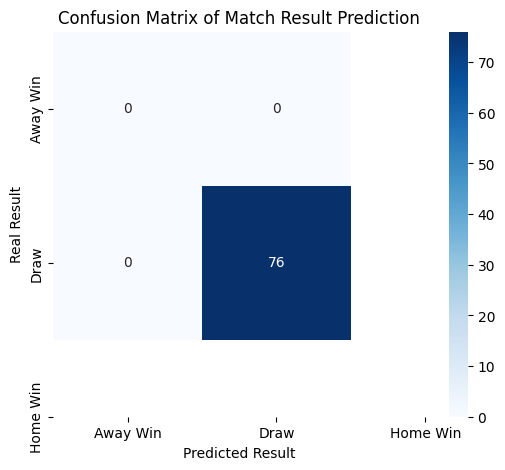

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('sports_betting.csv')
print(df.head())
print(df.columns)
print(df.info())
print('----------')
print(df.isnull().sum())

#will use the columns odds, team names, and sport to try to predict the next winner!

df = df.drop(columns=['Draw_Odds'])
df[['Home_Team_Odds', 'Away_Team_Odds']] = df[['Home_Team_Odds', 'Away_Team_Odds']].fillna(df[['Home_Team_Odds', 'Away_Team_Odds']].mean())


# 1. Create 'Result' column
def get_result(row):
    if row['Actual_Winner'] == row['Home_Team']:
        return 'Home Win'
    elif row['Actual_Winner'] == row['Away_Team']:
        return 'Away Win'
    else:
        return 'Draw'

df['Result'] = df.apply(get_result, axis=1)

# Make and train the model
features = ['Sport', 'Home_Team', 'Away_Team', 'Home_Team_Odds', 'Away_Team_Odds']
target = 'Result'
x = df[features]
y = df[target]
x_encoded = pd.get_dummies(x)

# Make and train the model
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=40)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("--------Random forest Prediction Accuracy--------")
print(accuracy)

#Check Model Accuracy for Each Class
# Show a report for each class (how well the model predicts each one)
print(classification_report(y_test, y_pred))

# Confusion matrix: shows where model guesses match or mismatch real results
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=['Away Win, Draw', 'Home Win'])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Away Win', 'Draw', 'Home Win'],
            yticklabels=['Away Win', 'Draw', 'Home Win'])

plt.xlabel('Predicted Result')
plt.ylabel('Real Result')
plt.title('Confusion Matrix of Match Result Prediction')
plt.show()                              


# Make a DataFrame for Tableau export
comparison = x_test.copy()
comparison['Real_Result'] = y_test
comparison['Predicted_Result'] = y_pred
comparison['Correct'] = comparison['Real_Result'] == comparison['Predicted_Result']

# Reset index so you have a column to join with match data if needed
comparison = comparison.reset_index()

# Save to CSV for Tableau
comparison[['index', 'Real_Result', 'Predicted_Result', 'Correct']].to_csv('prediction_comparison.csv', index=False)

# Build the comparison DataFrame
comparison = x_test.copy()
comparison['Real_Result'] = y_test
comparison['Predicted_Result'] = y_pred
comparison['Correct'] = comparison['Real_Result'] == comparison['Predicted_Result']

# Reset index for unique ID (optional but useful in Tableau)
comparison = comparison.reset_index()

# Save what Tableau needs
comparison[['index', 'Real_Result', 'Predicted_Result', 'Correct']].to_csv('prediction_comparison.csv', index=False)
